# TensorFlow for ICT Applications

## Lab session 3: Neural networks

**Content for this lab session:**

1. We analyze a simple medical scenario for predictive diagnostics.
2. How to use tf.data to load the dataset.
3. How to build models with tf.keras.layers.
4. How to train and optimize these models.
5. How to use the high-level Keras training interface.

In [ ]:
# Get the dataset from here (wdbc.data):
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### COLAB ONLY: Upload the dataset

In [ ]:
# Install TensorFlow 2.0 (alpha preview)
!pip install tensorflow==2.0.0-alpha0 

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

### Load and preprocess the dataset

In [1]:
# Pandas is a great library to load and process text data
import pandas as pd
df = pd.read_csv('wdbc.data', header=None)

In [2]:
# Inspect the first rows
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Separate targets and inputs
import numpy as np
X = df.values[:, 2:].astype(np.float64)
y = df.values[:, 1]

In [7]:
# Normalize data
from sklearn import preprocessing
X = preprocessing.scale(X)

In [8]:
# Transform targets into binary numbers
y_num = np.zeros((y.shape[0], 1))
y_num[y == 'B'] = 1.0

In [24]:
# Get a test split of the dataset
from sklearn import model_selection
Xtrain, Xtest, ytrain, ytest = \
    model_selection.train_test_split(X, y_num, test_size=0.25, stratify=y)

In [25]:
# Sanity check (there should be no NaNs)
import numpy as np
np.sum(np.isnan(X))

0

### Loading data with tf.data

In [26]:
import tensorflow as tf

In [27]:
# tf.data has many ways of loading data, this one is good for tensors
train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain, ytrain))

In [28]:
test_dataset = \
    tf.data.Dataset.from_tensor_slices((Xtest, ytest))

In [29]:
# One single pass over the dataset (does nothing)
for xb, yb in train_dataset.batch(4):
    print(xb.shape)
    break

(4, 30)


### Defining a model with tf.layers

In [36]:
# Logistic regression can be modeled as a single layer
model = tf.keras.layers.Dense(1, activation='sigmoid')

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [72]:
# Uncomment if you want to train a neural network instead
#model = Sequential()
#model.add(Input([30]))
#model.add(Dense(15, activation='sigmoid'))
#model.add(Dense(15, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


### Defining an optimizer

In [74]:
# Define an optimizer and loss
# opt = tf.keras.optimizers.SGD(learning_rate=0.1)
opt = tf.keras.optimizers.Adam()
loss = tf.losses.binary_crossentropy

### Computing the accuracy

In [76]:
from tensorflow import metrics
def compute_accuracy(model):
    acc = metrics.Accuracy()
    for xb, yb in test_dataset.batch(32): # Note how we are not shuffling the test dataset
        acc(yb, tf.round(model(xb)))
        
    # tf.reduce_mean(ytest == tf.round(model(Xtest)))
    return acc.result()

In [77]:
compute_accuracy(model)

<tf.Tensor: id=430125, shape=(), dtype=float32, numpy=0.6293706>

### Main train loop

In [78]:
epochs = 50

In [79]:
loss_history = []
test_acc_history = []

In [80]:
# Main training loop
for epoch in range(epochs):
    
    # Compute the test accuracy
    test_acc_history.append(compute_accuracy(model))
    
    for xb, yb in train_dataset.shuffle(1000).batch(32):
        
        # Loss computation
        with tf.GradientTape() as tape:
            ypred = model(xb)
            l = tf.reduce_mean(loss(yb, ypred))
        
        loss_history.append(l.numpy())
        
        # Gradient computation
        grad = tape.gradient(l, model.trainable_variables)
        
        # Optimization
        opt.apply_gradients(zip(grad, model.trainable_variables))

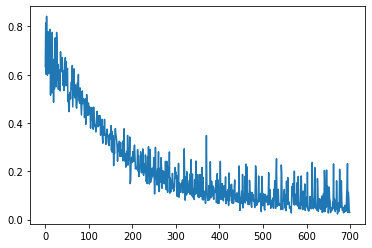

In [81]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.show()

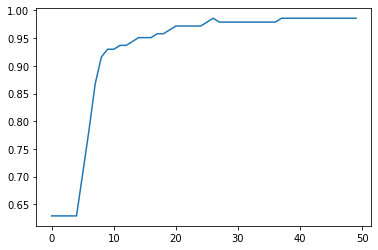

In [82]:
plt.plot(test_acc_history)

In [91]:
model = Sequential()
model.add(Input([30]))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

### High-level Keras interface

In [93]:
from tensorflow.keras.metrics import FalsePositives
model.compile(loss=loss, \
              optimizer=opt, \
              metrics=['accuracy', FalsePositives()])

In [94]:
history = model.fit(train_dataset.shuffle(1000).batch(32), \
          epochs=10, \
          validation_data=test_dataset.batch(32))

Epoch 1/10
14/14 [==============================] - 1s 95ms/step - loss: 0.5990 - accuracy: 0.7113 - false_positives: 118.0000 - val_loss: 0.5131 - val_accuracy: 0.7483 - val_false_positives: 36.0000
Epoch 2/10
14/14 [==============================] - 0s 7ms/step - loss: 0.4476 - accuracy: 0.8333 - false_positives: 70.0000 - val_loss: 0.3662 - val_accuracy: 0.9301 - val_false_positives: 10.0000
Epoch 3/10
14/14 [==============================] - 0s 7ms/step - loss: 0.3178 - accuracy: 0.9319 - false_positives: 23.0000 - val_loss: 0.2580 - val_accuracy: 0.9510 - val_false_positives: 6.0000
Epoch 4/10
14/14 [==============================] - 0s 7ms/step - loss: 0.2325 - accuracy: 0.9413 - false_positives: 18.0000 - val_loss: 0.1891 - val_accuracy: 0.9580 - val_false_positives: 5.0000
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: 0.1799 - accuracy: 0.9601 - false_positives: 12.0000 - val_loss: 0.1476 - val_accuracy: 0.9790 - val_false_positives: 3.0000
Epoch 6/10


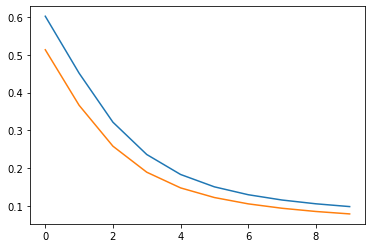

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])